In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font',family ='serif')
plt.rc('text',usetex =True)

In [2]:
ef f(Psi,t,params):
    w0,w1,w = params
    w0 = w0*w00
    w1 = w1*w00
    w = w*w00
    aR = Psi[0]
    aI = Psi[1]
    bR = Psi[2]
    bI = Psi[3]
    daR = 1/2*(w0*aI+w1*np.cos(w*t)*bI)
    daI = -1/2*(w0*aR+w1*np.cos(w*t)*bR)
    dbR =  1/2*(w1*np.cos(w*t)*aI-w0*bI)
    dbI =  -1/2*(w1*np.cos(w*t)*aR-w0*bR)
    
    return np.array([daR,daI,dbR,dbI])


def RK_Solve(f,t0,tf,aR0,aI0,bR0,bI0,N,params):
    w0,w1,w = params
    h = (tf-t0)/N
    tpoints = np.arange(t0,tf,h)
    aR = []
    aI =[]
    bR= []
    bI = []

    r = np.array([aR0,aI0,bR0,bI0],complex)
    for t in tpoints:
        aR.append(r[0])
        aI.append(r[1])
        bR.append(r[2])
        bI.append(r[3])

        k1 = h*f(r,t,params)
        k2 = h*f(r+0.5*k1,t+0.5*h,params)
        k3 = h*f(r+0.5*k2,t+0.5*h,params)
        k4 = h*f(r+k3,t+h,params)
        r += 1/6*(k1+2.*k2+2.*k3+k4)
         
    return tpoints,np.array(aR),np.array(aI),np.array(bR),np.array(bI)



In [4]:
# find P_up, P_down and transition rate
def P_z(w0,w1,w,r0):
    t = np.linspace(0,3*T1,600)
    params = [w0,w1,w]
#     t,aR,aI,bR,bI= RK_Solve(f,0,3*T1,1.,0.,0.,0.,5000, params =(w0,w1,w)) #solce by Runge Kutta
    psoln = odeint(f, r0, t, args=(params,)) # solve by odeint
    aR = psoln[:,0]
    aI = psoln[:,1]
    bR = psoln[:,2]
    bI = psoln[:,3]
    P_up = list(map(lambda r,i: abs(r+i*1j)**2,aR,aI))
    P_down = list(map(lambda r,i: abs(r+i*1j)**2,bR,bI))
    transition_rate = np.max(P_down)
    return t,P_up,P_down,transition_rate

In [5]:
### some paramters from the data in the book
hbar = 4.135667696*10**-15
g = 2
q = 4.803207 *10**(-10) # in Gaussian units
m = 1.883533* 10**(-25)  
c = 3.0*10**10 #cm/s
B0 = 60
B1 = 6
w00 = g*q/(2*m*c)*B0
w1 = g*q/(2*m*c)*B1
T1 = 2*np.pi/w1 #12 microscond 12*10^-6

### At resonance, and a weak osciallting field

In [6]:
r0 = [1.0,0.,0.,0.]
t,P_up,P_down,transition_rate = P_z(1.0,0.1,1.0,r0)
fig,ax= plt.subplots(figsize=(20,11))
ax.plot(t,P_up,label='Probability of spin up $| \langle +z | \psi \\rangle |^2$')
ax.plot(t,P_down,label='Probability of spin down $| \langle -z | \psi \\rangle |^2$')
ax.set_title('$f_0= %0.2f kHz$, $f_1 = %0.2f kHz$(applied field strength), $f = %0.2f kHz$(applied field frequency)'%(f0,f1,fap), fontsize=30)
ax.set_xlim(0,3*T1)
ax.legend(loc='upper right', fontsize='xx-large')
# ax.set_ylabel('$Probablity$ ')
ax.set_xlabel('$t$')
ax.set_xticks(np.arange(0,3*T1,T1/2))
#     ax.set_xticklabels(['','$\\frac{\pi}{\omega_1}$','$\\frac{2 \pi }{\omega_1}$','$\\frac{3 \pi }{\omega_1}$','$\\frac{4 \pi }{\omega_1}$','$\\frac{5 \pi }{\omega_1}$'],fontsize=30)
ax.grid(True)
transition_rate = np.max(P_down)
ax.annotate("Transition rate = %0.2f"%transition_rate, (0.71,0.8),xycoords = "figure fraction", fontsize = 25)
#     return fig

# plot_prob(1.,0.1,1.)
# plt.show()
# plt.savefig('C:/Users/lenovo/Desktop/PHYS302/f080f80.png')   

# plot_prob(1.,0.1,0.2)
# plt.show()


NameError: name 'odeint' is not defined

### varying the frequency of the oscillating field - transition rate

In [5]:
def plot_transition_rate(w0,w1): 
    w0 = w0*w00
    w1 = w1*w00
    #b the factor between B0 and B1
    w_list = np.arange(0,2.2,0.02)
    rate = np.array(list(map(lambda w: R_k(w0,w1,w,r0), w_list)))[:,3]

    fig2,ax2 = plt.subplots(figsize=(15,7))
    ax2.plot(w_list,rate,'o-',markersize=8)
    ax2.grid(True)
    ax2.set_xlabel('$\\frac{\omega}{\omega_0}$', fontsize=20)
    ax2.set_title('Transtion Rate vs oscillating field frequency $\omega$', fontsize=20)
    ax2.xaxis.set_label_coords(1.01, -0.01)
#     ax.set_xticks(np\.arange(0,3,1))
#     ax.set_xticklabels(['','$\\frac{1}{\omega_1}$','$\\frac{2 \pi }{\omega_1}$','$\\frac{3 \pi }{\omega_1}$','$\\frac{4 \pi }{\omega_1
#    

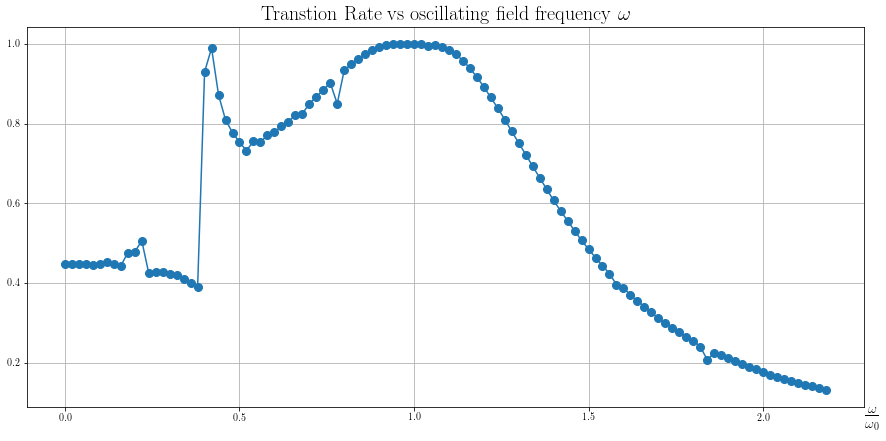

In [22]:
plot_transition_rate(1.,0.9)
# plt.savefig('C:/Users/lenovo/Desktop/PHYS302/varyingOmega.png')
# transition_rate(1.,0.6)

### Interactively adjusting applied frequency and applied field strength

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [10]:
interact(plot_prob, w0 = widgets.FloatSlider(min=0, max=2,step=0.05,value=1., description='Intrinsic $\omega_0$'),
         w1 = widgets.FloatSlider(min=0.01, max=2.01,step=0.05, description='B1 $\omega_1$'),
         w = widgets.FloatSlider(min=0, max=2,step=0.05, description='Applied $\omega$'))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='Intrinsic $\\omega_0$', max=2.0, step=0.05), FloatSlider(value=0.01, description='B1 $\\omega_1$', max=2.01, min=0.01, step=0.05), FloatSlider(value=0.0, description='Applied $\\omega$', max=2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

### Interactively adjusting the strength of DC and AC signals: transtion rate vs $\omega$

In [11]:
interact(plot_transition_rate, w0 = widgets.FloatSlider(min=0, max=2,step=0.05,value=1., description='DC $B_0$ $\omega_0$'),
         w1 = widgets.FloatSlider(min=0.01, max=2.01,step=0.05, description='AC $B1$ $\omega_1$'))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='DC $B_0$ $\\omega_0$', max=2.0, step=0.05), FloatSlider(value=0.01, description='AC $B1$ $\\omega_1$', max=2.01, min=0.01, step=0.05), Output()), _dom_classes=('widget-interact',))

### Spin cone animation

In [16]:
w0 = 1*w00
w1 = 0.1*w00
w = 1*w00
T = 2*np.pi/w1
t,aR,aI,bR,bI= RK_Solve(f,0,3*T1,1.,0.,0.,0.,5000, params =(w0,w1,w))
P_up = np.array(list(map(lambda r,i: abs(r+i*1j)**2,aR,aI)))
P_down = np.array(list(map(lambda r,i: abs(r+i*1j)**2,bR,bI)))


In [17]:
sz= np.array(P_up)/2 + P_down/(-2) # a factor of hbar
sz

array([ 0.5       ,  0.49999645,  0.49998582, ..., -0.49981541,
       -0.49982999, -0.49983934])

In [ ]:
P_xup = 